In [1]:
!pip install tensorflow-gpu==2.0.0-rc0


     |████████████████████████████████| 380.5MB 41kB/s 
     |████████████████████████████████| 501kB 36.8MB/s 
     |████████████████████████████████| 4.3MB 37.4MB/s 


In [0]:

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [3]:
!git clone https://github.com/laxmimerit/Movies-Poster_Dataset.git

Cloning into 'Movies-Poster_Dataset'...
remote: Enumerating objects: 7873, done.
remote: Counting objects: 100% (7873/7873), done.
remote: Compressing objects: 100% (7873/7873), done.
remote: Total 7873 (delta 1), reused 7872 (delta 0), pack-reused 0
Receiving objects: 100% (7873/7873), 246.59 MiB | 42.04 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Checking out files: 100% (7871/7871), done.


In [3]:

data = pd.read_csv('/content/Movies-Poster_Dataset/train.csv')
data.shape

(7254, 27)

In [4]:
data.head()

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [6]:
img_width = 350
img_height = 350

X = []
for i in tqdm(range(data.shape[0])):
  path = '/content/Movies-Poster_Dataset/Images/' + data['Id'][i] + '.jpg'
  img = image.load_img(path, target_size=(img_width, img_height, 3))
  img = image.img_to_array(img)
  img = img/255.0
  X.append(img)

X = np.array(X)

100%|██████████| 7254/7254 [00:34<00:00, 210.52it/s]


In [7]:

X.shape

(7254, 350, 350, 3)

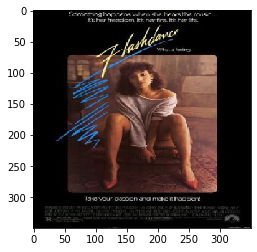

In [8]:
plt.imshow(X[1])

In [9]:
data['Genre'][1]

"['Drama', 'Romance', 'Music']"

In [10]:
y = data.drop(['Id', 'Genre'], axis = 1)
y = y.to_numpy()
y.shape

(7254, 25)

In [0]:

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.15)

In [12]:
X_train[0].shape

(350, 350, 3)

In [0]:
def SaveModelFile(ClassifyModel,save_model_filename):
    """
    Saves trained classification model
    
    Args:
        ClassifyModel : trained classification Model
        save_model_filename(str): filename, to save trained model,without extension.
        
    Returns:
        save_model_filename(str): filename with extension.
    """
    save_model_filename = save_model_filename +'.h5'
    ClassifyModel.save(save_model_filename)
    print('Done Saving Model File...')
    return save_model_filename

**FIRST MODEL**

In [0]:
model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.4))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(25, activation='sigmoid'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 348, 348, 16)      448       
_________________________________________________________________
batch_normalization (BatchNo (None, 348, 348, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 174, 174, 16)      0         
_________________________________________________________________
dropout (Dropout)            (None, 174, 174, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 172, 172, 32)      4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 172, 172, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 86, 86, 32)        0

In [0]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [18]:
history = model.fit(X_train, y_train,batch_size=32, epochs=20, validation_data=(X_test, y_test))

Train on 6165 samples, validate on 1089 samples
Epoch 1/20
6165/6165 [==============================] - 14s 2ms/sample - loss: 0.2365 - accuracy: 0.9147 - val_loss: 0.2402 - val_accuracy: 0.9122
Epoch 2/20
6165/6165 [==============================] - 14s 2ms/sample - loss: 0.2346 - accuracy: 0.9149 - val_loss: 0.2453 - val_accuracy: 0.9103
Epoch 3/20
6165/6165 [==============================] - 14s 2ms/sample - loss: 0.2346 - accuracy: 0.9149 - val_loss: 0.2404 - val_accuracy: 0.9106
Epoch 4/20
6165/6165 [==============================] - 14s 2ms/sample - loss: 0.2322 - accuracy: 0.9157 - val_loss: 0.2363 - val_accuracy: 0.9113
Epoch 5/20
6165/6165 [==============================] - 14s 2ms/sample - loss: 0.2300 - accuracy: 0.9162 - val_loss: 0.2359 - val_accuracy: 0.9125
Epoch 6/20
6165/6165 [==============================] - 14s 2ms/sample - loss: 0.2297 - accuracy: 0.9160 - val_loss: 0.2322 - val_accuracy: 0.9122
Epoch 7/20
6165/6165 [==============================] - 14s 2ms/sample

In [19]:
#Save the model
trainedModel_Filename = SaveModelFile(model,'multiLabel_firstModel')

Done Saving Model File...


In [0]:

def plot_learningCurve(history, epoch,title1, title2):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()
  plt.savefig(title1)

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()
  plt.savefig(title2)

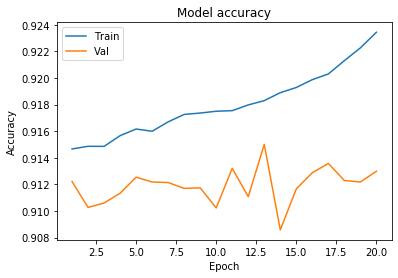

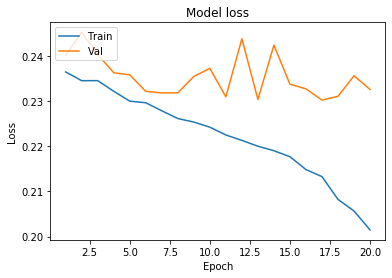

<Figure size 432x288 with 0 Axes>

In [21]:
plot_learningCurve(history, 20,"accuracy_firstModel.png","loss_firstModel.png" )

**SECOND MODEL**

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
model2 = Sequential()
model2.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same',
                  activation ='relu', input_shape = X_train[0].shape))
model2.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', activation ='relu'))
    
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(BatchNormalization())
model2.add(Dropout(0.25))

model2.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model2.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))

model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(BatchNormalization())
model2.add(Dropout(0.25))

model2.add(Conv2D(filters = 86, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model2.add(Conv2D(filters = 86, kernel_size = (3,3),padding = 'Same', activation ='relu'))
    
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(BatchNormalization())
model2.add(Dropout(0.25))
    
model2.add(Flatten())
model2.add(Dense(1024, activation = "relu"))
model2.add(Dropout(0.5))
model2.add(Dense(512, activation = "relu"))
model2.add(Dropout(0.5))
model2.add(Dense(25, activation = "sigmoid"))
    
model2.compile(loss = 'binary_crossentropy',optimizer = Adam(lr=1e-5, decay=1e-6),metrics=['accuracy'])
    
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=130,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.5,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.0,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=True)  # randomly flip images


In [17]:
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 350, 350, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 350, 350, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 175, 175, 32)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 175, 175, 32)      128       
_________________________________________________________________
dropout (Dropout)            (None, 175, 175, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 175, 175, 64)      18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 175, 175, 64)      3

In [19]:
history =model2.fit_generator(datagen.flow(X_train, y_train, batch_size=32),
              verbose=1,
              epochs=20,
              validation_data=(X_test, y_test))
#Save the model
trainedModel_Filename = SaveModelFile(model2,'multiLabel_secondModel')
    

Epoch 1/20
193/193 [==============================] - 166s 858ms/step - loss: 0.5232 - accuracy: 0.8106 - val_loss: 0.3223 - val_accuracy: 0.9064
Epoch 2/20
193/193 [==============================] - 159s 824ms/step - loss: 0.4090 - accuracy: 0.8584 - val_loss: 0.2961 - val_accuracy: 0.9066
Epoch 3/20
193/193 [==============================] - 159s 822ms/step - loss: 0.3634 - accuracy: 0.8737 - val_loss: 0.3165 - val_accuracy: 0.9063
Epoch 4/20
193/193 [==============================] - 158s 821ms/step - loss: 0.3407 - accuracy: 0.8797 - val_loss: 0.2772 - val_accuracy: 0.9075
Epoch 5/20
193/193 [==============================] - 157s 815ms/step - loss: 0.3257 - accuracy: 0.8858 - val_loss: 0.2776 - val_accuracy: 0.9069
Epoch 6/20
193/193 [==============================] - 157s 813ms/step - loss: 0.3148 - accuracy: 0.8893 - val_loss: 0.2795 - val_accuracy: 0.9069
Epoch 7/20
193/193 [==============================] - 157s 813ms/step - loss: 0.3055 - accuracy: 0.8921 - val_loss: 0.2724 -

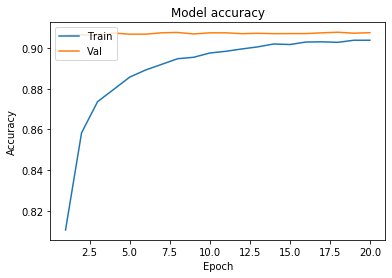

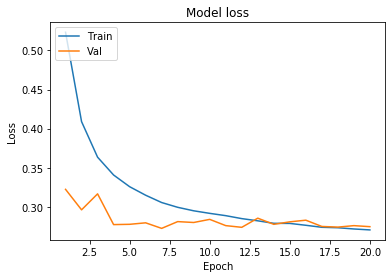

<Figure size 432x288 with 0 Axes>

In [20]:
plot_learningCurve(history, 20,"accuracy_secondModel.png","loss_secondModel.png" )

**FINE TUNING**


In [24]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense

img_width = 224
img_height = 224

X = []
for i in tqdm(range(data.shape[0])):
  path = '/content/Movies-Poster_Dataset/Images/' + data['Id'][i] + '.jpg'
  img = image.load_img(path, target_size=(img_width, img_height, 3))
  img = image.img_to_array(img)
  img = img/255.0
  X.append(img)

X = np.array(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.15)


# Charger VGG-16 pré-entraîné sur ImageNet et sans les couches fully-connected

base_model = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
model3 = Sequential()
model3.add(base_model)
for layer in model3.layers:
   layer.trainable = True
model3.add(Flatten())
model3.add(Dense(1024, activation = "relu"))
model3.add(Dropout(0.5))
model3.add(Dense(512, activation = "relu"))
model3.add(Dropout(0.5))
model3.add(Dense(25, activation = "sigmoid"))



model3.summary()

100%|██████████| 7254/7254 [00:27<00:00, 259.58it/s]


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 1024)              25691136  
_________________________________________________________________
dropout_9 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_10 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 25)               

In [0]:

model3.compile(loss = 'binary_crossentropy',optimizer = Adam(lr=1e-5, decay=1e-6),metrics=['accuracy'])

In [29]:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=130,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.5,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.0,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=True)  # randomly flip images

history =model3.fit_generator(datagen.flow(X_train, y_train, batch_size=32),
              verbose=1,
              epochs=20,
              validation_data=(X_test, y_test))
#Save the model
trainedModel_Filename = SaveModelFile(model2,'multiLabel_fine_tuning')
    

Epoch 1/20
193/193 [==============================] - 74s 383ms/step - loss: 0.3254 - accuracy: 0.8837 - val_loss: 0.2520 - val_accuracy: 0.9095
Epoch 2/20
193/193 [==============================] - 72s 374ms/step - loss: 0.2981 - accuracy: 0.8975 - val_loss: 0.2466 - val_accuracy: 0.9143
Epoch 3/20
193/193 [==============================] - 72s 375ms/step - loss: 0.2837 - accuracy: 0.9025 - val_loss: 0.2430 - val_accuracy: 0.9155
Epoch 4/20
193/193 [==============================] - 72s 373ms/step - loss: 0.2765 - accuracy: 0.9047 - val_loss: 0.2384 - val_accuracy: 0.9160
Epoch 5/20
193/193 [==============================] - 73s 376ms/step - loss: 0.2697 - accuracy: 0.9075 - val_loss: 0.2368 - val_accuracy: 0.9171
Epoch 6/20
193/193 [==============================] - 72s 373ms/step - loss: 0.2641 - accuracy: 0.9090 - val_loss: 0.2401 - val_accuracy: 0.9154
Epoch 7/20
193/193 [==============================] - 71s 370ms/step - loss: 0.2596 - accuracy: 0.9095 - val_loss: 0.2301 - val_ac

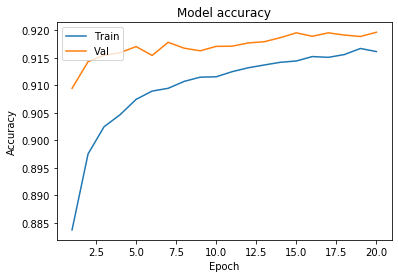

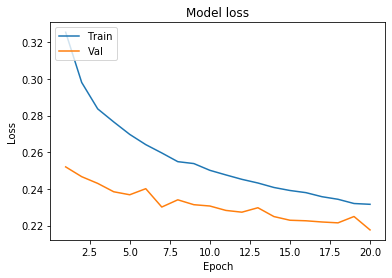

<Figure size 432x288 with 0 Axes>

In [30]:
plot_learningCurve(history, 20,"accuracy_finetuning.png","loss_finetuning.png" )